In [3]:
import os #for getting and change working directory
import matplotlib
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
import numpy as np #for data wrangling
import pandas as pd #for data wrangling

In [4]:
pd.options.display.float_format = '{:20,.2f}'.format

In [27]:
PROJECT_path = "C:\\Users\\sache\\documents"
CHAPTER = "CreditScoring"

In [8]:
def save_fig(fig_name, tight_layout=True):
    path = os.path.join(PROJECT_path,  CHAPTER, "images",fig_name + ".png")
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=350)

In [9]:
def cate_barplot(cate):
	gb = df.groupby(cate)
	gb.Y.mean().plot(kind='bar',rot=30, title =cate)
	save_fig(cate)
	plt.show()

In [10]:
%matplotlib inline

In [23]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["figure.figsize"] = (15,4)

In [18]:
df = pd.read_pickle('.\data\df_after_droppingEmpty.pkl')

Loan status

In [19]:
df.loan_status.value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [20]:
df['Y']= df.loan_status.map({'Charged Off':1, 
	'Does not meet the credit policy. Status:Charged Off':1, 
	'Does not meet the credit policy. Status:Fully Paid':0,
	'Fully Paid':0})
df.Y.value_counts()

0    36104
1     6431
Name: Y, dtype: int64

### Visualization

#### Default count and default rate over time

In [11]:
df.Y.resample('Y').agg(['count', 'sum'])

,count,sum
issue_d,,
2007-12-31,603,158
2008-12-31,2393,496
2009-12-31,5281,723
2010-12-31,12537,1757
2011-12-31,21721,3297


In [25]:
plt.style.use('ggplot')

Business has been growing significantly

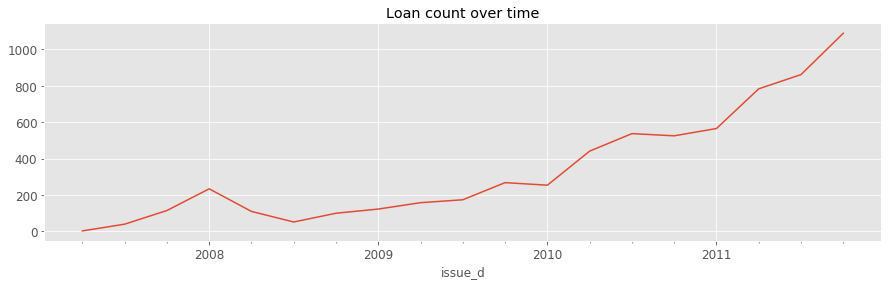

In [13]:
df.Y.resample('Q').sum().plot(figsize=(15,4), title="Loan count over time") 

Default rate has been kept low

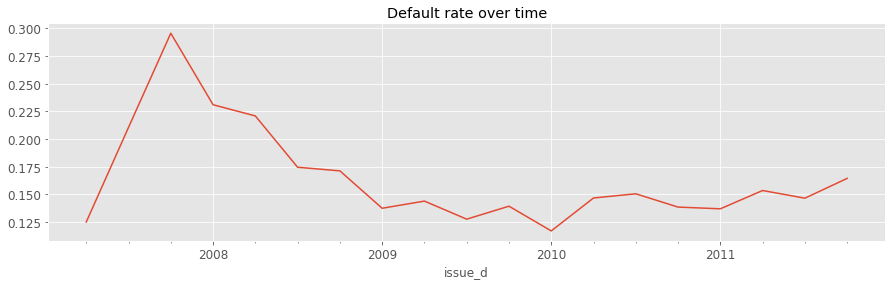

In [14]:
(df.Y.resample('Q').sum()/df.Y.resample('Q').count()).plot(figsize=(15,4), title="Default rate over time") 

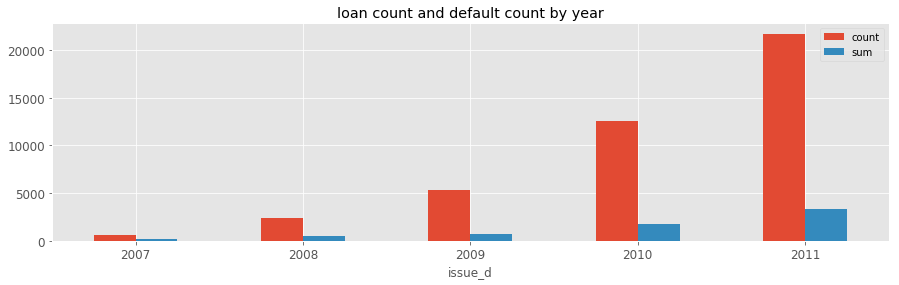

In [15]:
df.groupby(df.issue_d.dt.year).Y.agg(['count','sum']).plot(kind='bar', title="loan count and default count by year", rot=0)

##### Default rate over time

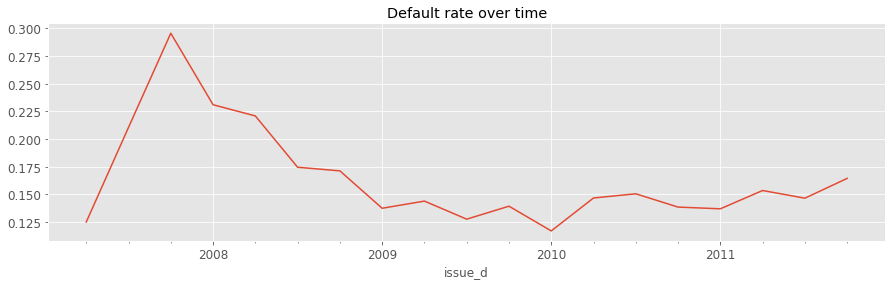

In [16]:
(df.Y.resample('Q').sum()/df.Y.resample('Q').count()).plot(figsize=(15,4), title="Default rate over time") 

###### Interst rate distribution


Histogram is like a barchart. But unlike a barchart whose bins have already been given, a histogram does not have fixed bins. You can define them by partitioning the numbers you are plotting into certain number of bins. For example, we are going to partition all the loans' interest rate into 50 bins, from the smallest to the largest.

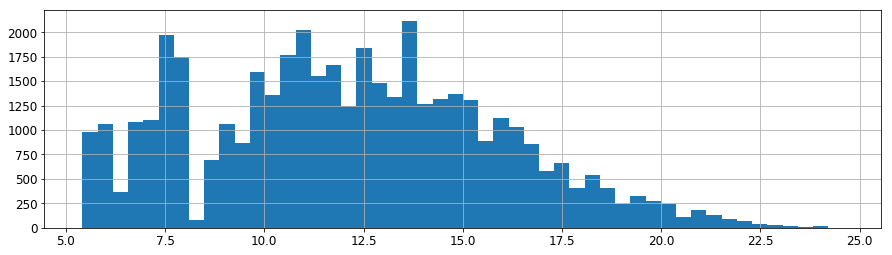

In [24]:
df.int_rate.hist(bins=50)

In [31]:
import warnings
warnings.filterwarnings("ignore")

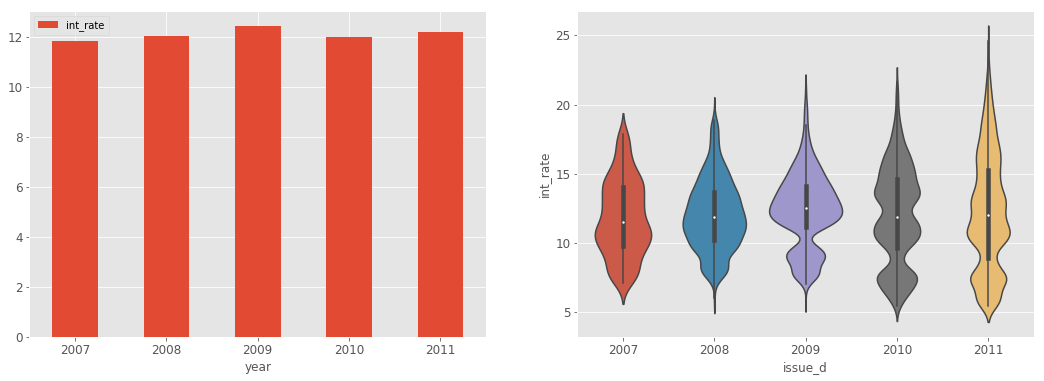

In [32]:
df['year'] = df.issue_d.dt.year
fig, axs = plt.subplots(1,2,figsize=(18,6))
df[['year','int_rate']].groupby('year').mean().plot(kind='bar', ax=axs[0], rot=0)
sns.violinplot(x=df.issue_d.dt.year, y='int_rate', data=df, ax=axs[1])

###### Credit grade and sub-grades bar plots

In [34]:
l = []
for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    for j in ['1', '2', '3', '4', '5']:
        l.append(i+j)  

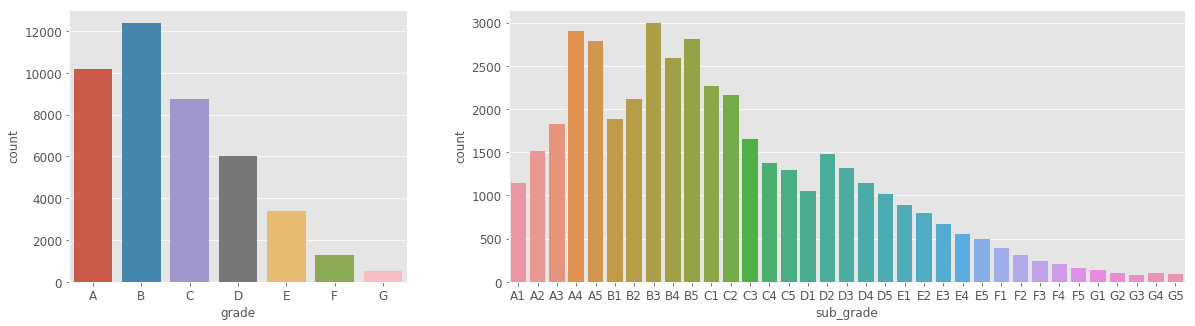

In [35]:
from matplotlib import gridspec
fig = plt.figure(figsize=(20, 5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 
ax0 = plt.subplot(gs[0])
sns.countplot(df['grade'], order = ('A','B','C','D','E','F','G'),  ax=ax0)

ax1 = plt.subplot(gs[1])   
sns.countplot(df['sub_grade'], order = l, ax=ax1)

###### employment length

Saving figure emp_length


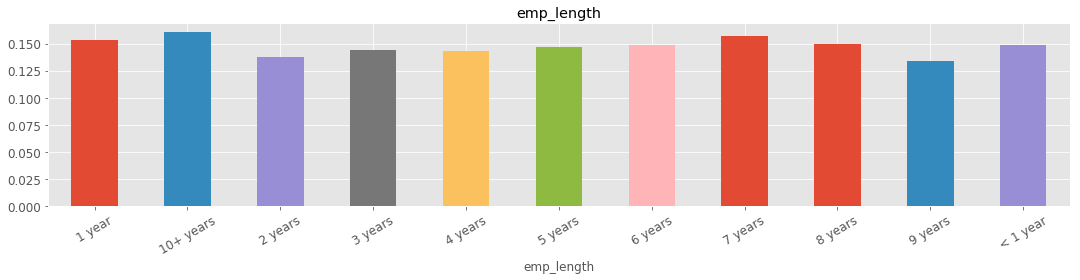

In [21]:
cate_barplot('emp_length')

###### home ownership

Saving figure home_ownership


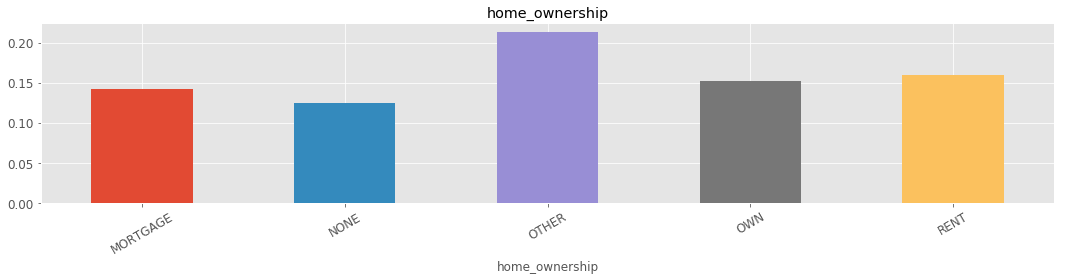

In [22]:
cate_barplot('home_ownership')

###### verification_status

Saving figure verification_status


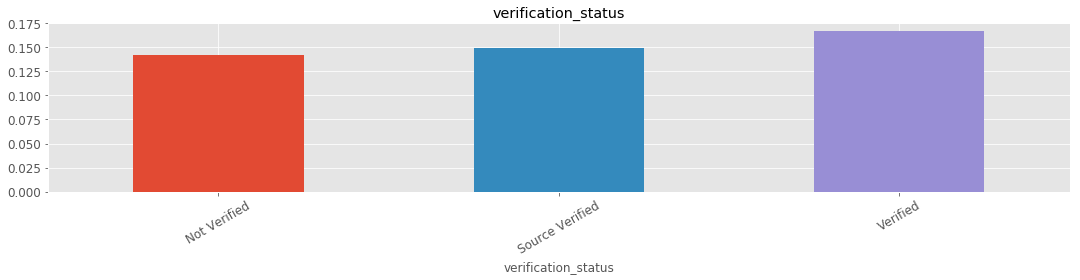

In [23]:
cate_barplot('verification_status')

Saving figure purpose


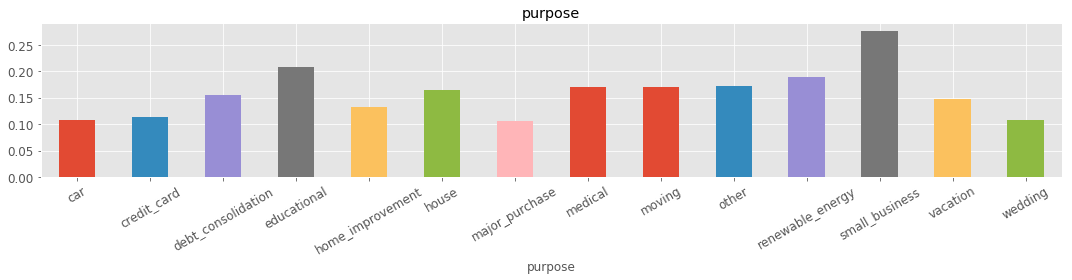

In [24]:
cate_barplot('purpose')

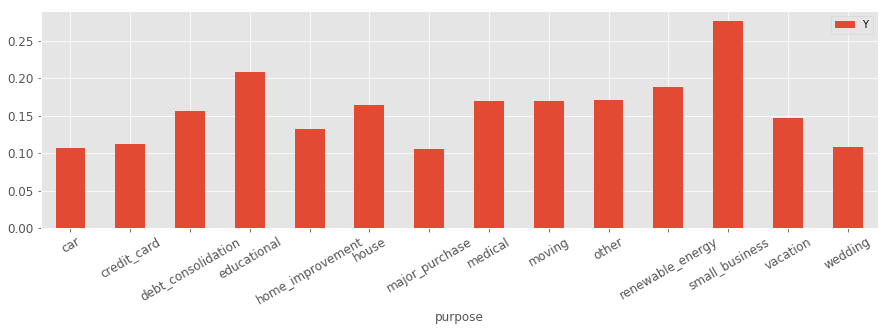

In [25]:
purpose_=pd.pivot_table(df, index = 'purpose',values = 'Y', aggfunc=[np.sum,len,np.mean])
plt.show(purpose_['mean'].plot(kind = 'bar', rot=30))